<a href="https://colab.research.google.com/github/seuha516/MachineLearningPractice/blob/main/DeeplearningStart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**딥러닝**의 시작

##Artificial Neural Network

###MNIST

In [2]:
from tensorflow import keras
(train_input,train_target),(test_input,test_target)=keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
print(train_input.shape,train_target.shape)
print(test_input.shape,test_target.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


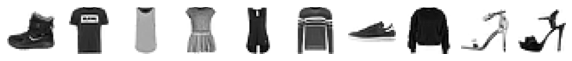

In [4]:
import matplotlib.pyplot as plt
fig,axs=plt.subplots(1,10,figsize=(10,10))
for i in range(10):
  axs[i].imshow(train_input[i],cmap='gray_r')
  axs[i].axis('off')
plt.show()

In [5]:
print([train_target[i] for i in range (10)])

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


In [6]:
import numpy as np
print(np.unique(train_target,return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


###Logistic Regression



In [7]:
train_scaled=train_input/255.0
train_scaled=train_scaled.reshape(-1,28*28)

print(train_scaled.shape)

(60000, 784)


In [8]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier

sc=SGDClassifier(loss='log',max_iter=5,random_state=42)
scores=cross_validate(sc,train_scaled,train_target,n_jobs=-1)
print(np.mean(scores['test_score']))

0.8195666666666668


##Tensorflow

In [9]:
import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import train_test_split
train_scaled,val_scaled,train_target,val_target=train_test_split(train_scaled,train_target,test_size=0.2,random_state=42)

print(train_scaled.shape,train_target.shape)
print(val_scaled.shape,val_target.shape)

(48000, 784) (48000,)
(12000, 784) (12000,)


In [10]:
dense=keras.layers.Dense(10,activation='softmax',input_shape=(784,))
model=keras.Sequential(dense)
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')

model.fit(train_scaled,train_target,epochs=5)

Epoch 1/5
1500/1500 [==============================] - 5s 1ms/step - loss: 0.7751 - accuracy: 0.7433
Epoch 2/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4798 - accuracy: 0.8380
Epoch 3/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4672 - accuracy: 0.8441
Epoch 4/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4390 - accuracy: 0.8511
Epoch 5/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4374 - accuracy: 0.8536


In [11]:
model.evaluate(val_scaled,val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.4585 - accuracy: 0.8444


[0.45846137404441833, 0.8444166779518127]

###Deep Neural

In [12]:
dense1=keras.layers.Dense(100,activation='sigmoid',input_shape=(784,))
dense2=keras.layers.Dense(10,activation='softmax')
model=keras.Sequential([dense1,dense2])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [13]:
model=keras.Sequential([
  keras.layers.Dense(100,activation='sigmoid',input_shape=(784,),name='hidden'),
  keras.layers.Dense(10,activation='softmax',name='output')
],name='패션 MNIST 모델')

model.summary()

Model: "패션 MNIST 모델"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 100)               78500     
_________________________________________________________________
output (Dense)               (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [14]:
model=keras.Sequential()
model.add(keras.layers.Dense(100,activation='sigmoid',input_shape=(784,)))
model.add(keras.layers.Dense(10,activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')
model.fit(train_scaled,train_target,epochs=5)

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.7646 - accuracy: 0.7551
Epoch 2/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4215 - accuracy: 0.8480
Epoch 3/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3735 - accuracy: 0.8651
Epoch 4/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3516 - accuracy: 0.8732
Epoch 5/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3285 - accuracy: 0.8806


###ReLU function

In [16]:
model=keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [17]:
(train_input,train_target),(test_input,test_target)=keras.datasets.fashion_mnist.load_data()
train_scaled=train_input/255.0
train_scaled,val_scaled,train_target,val_target=train_test_split(train_scaled,train_target,test_size=0.2,random_state=42)

model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')
model.fit(train_scaled,train_target,epochs=5)

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.6765 - accuracy: 0.7598
Epoch 2/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4022 - accuracy: 0.8537
Epoch 3/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3505 - accuracy: 0.8727
Epoch 4/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3377 - accuracy: 0.8788
Epoch 5/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3218 - accuracy: 0.8857


In [18]:
model.evaluate(val_scaled,val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.4030 - accuracy: 0.8577


[0.4029650092124939, 0.8576666712760925]

###Optimizer

In [19]:
model=keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
model.fit(train_scaled,train_target,epochs=5)

Epoch 1/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.6800 - accuracy: 0.7631
Epoch 2/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4044 - accuracy: 0.8554
Epoch 3/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3587 - accuracy: 0.8693
Epoch 4/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3314 - accuracy: 0.8790
Epoch 5/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3155 - accuracy: 0.8850


In [20]:
model.evaluate(val_scaled,val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3403 - accuracy: 0.8792


[0.3402673900127411, 0.8792499899864197]

##Model Training

In [21]:
(train_input,train_target),(test_input,test_target)=keras.datasets.fashion_mnist.load_data()
train_scaled=train_input/255.0
train_scaled,val_scaled,train_target,val_target=train_test_split(train_scaled,train_target,test_size=0.2,random_state=42)

def model_fn(a_layer=None):
  model=keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28,28)))
  model.add(keras.layers.Dense(100,activation='relu'))
  if a_layer:
    model.add(a_layer)
  model.add(keras.layers.Dense(10,activation='softmax'))
  return model

In [22]:
model=model_fn()
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')
history=model.fit(train_scaled,train_target,epochs=5,verbose=0)

In [24]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


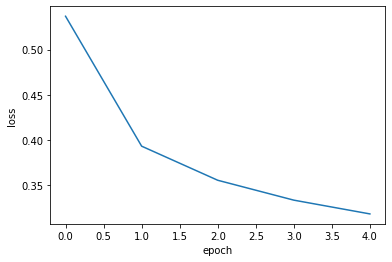

In [25]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

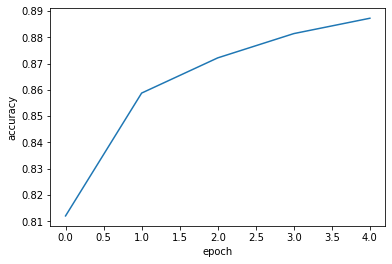

In [26]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

###Epochs=20

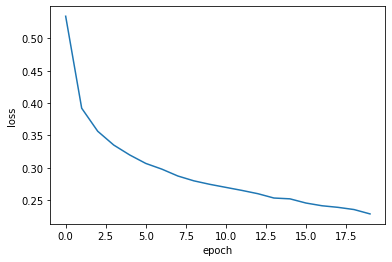

In [27]:
model=model_fn()
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')
history=model.fit(train_scaled,train_target,epochs=20,verbose=0)

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [28]:
model=model_fn()
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')
history=model.fit(train_scaled,train_target,epochs=20,verbose=0,
                  validation_data=(val_scaled,val_target))

In [29]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


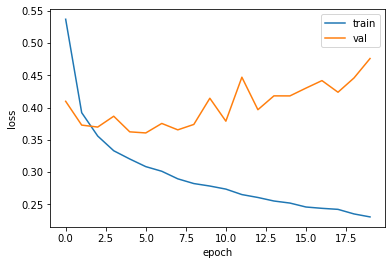

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

###Optimizer

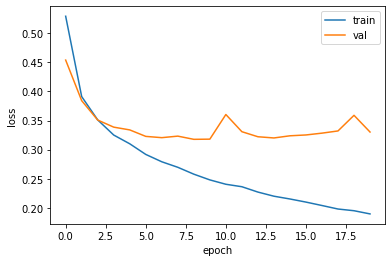

In [31]:
model=model_fn()
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics='accuracy')
history=model.fit(train_scaled,train_target,epochs=20,verbose=0,
                  validation_data=(val_scaled,val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

###Dropout

In [32]:
model=model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 100)               78500     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


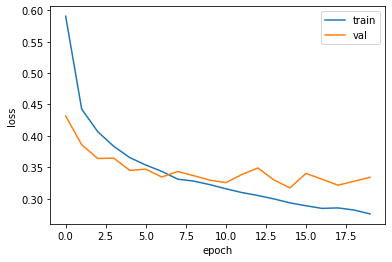

In [33]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics='accuracy')
history=model.fit(train_scaled,train_target,epochs=20,verbose=0,
                  validation_data=(val_scaled,val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

###Model Save

In [34]:
model=model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics='accuracy')
history=model.fit(train_scaled,train_target,epochs=10,verbose=0,
                  validation_data=(val_scaled,val_target))

model.save_weights('model-weights.h5')
model.save('model-whole.h5')

!ls -al *.h5

-rw-r--r-- 1 root root 332480 Mar 22 06:37 model-weights.h5
-rw-r--r-- 1 root root 981776 Mar 22 06:37 model-whole.h5


In [35]:
model=model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weights.h5')

In [38]:
import numpy as np
val_labels=np.argmax(model.predict(val_scaled),axis=-1)
print(np.mean(val_labels==val_target))

0.8839166666666667


In [39]:
model=keras.models.load_model('model-whole.h5')
model.evaluate(val_scaled,val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3265 - accuracy: 0.8839


[0.326452374458313, 0.8839166760444641]

###Callback

In [40]:
model=model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics='accuracy')

checkpoint_cb=keras.callbacks.ModelCheckpoint('best-model.h5')
model.fit(train_scaled,train_target,epochs=20,verbose=0,
          validation_data=(val_scaled,val_target),
          callbacks=[checkpoint_cb])

model=keras.models.load_model('best-model.h5')
model.evaluate(val_scaled,val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3193 - accuracy: 0.8866


[0.3193037807941437, 0.8865833282470703]

In [41]:
model=model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics='accuracy')

checkpoint_cb=keras.callbacks.ModelCheckpoint('best-model.h5')
early_stopping_cb=keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True)
history=model.fit(train_scaled,train_target,epochs=20,verbose=0,
                  validation_data=(val_scaled,val_target),
                  callbacks=[checkpoint_cb,early_stopping_cb])

In [42]:
print(early_stopping_cb.stopped_epoch)

15


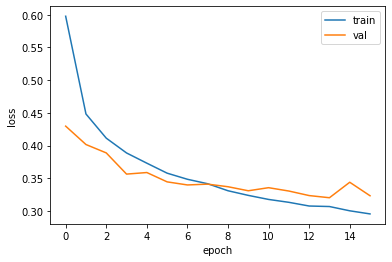

In [43]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [44]:
model.evaluate(val_scaled,val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3203 - accuracy: 0.8878


[0.3202793598175049, 0.8877500295639038]